# Model Evaluation - Precision Case

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
crime = pd.read_csv("https://raw.githubusercontent.com/ingledarshan/INSAID/main/criminal_train.csv")
crime.shape

(45718, 72)

In [3]:
crime.head()

,PERID,IFATHER,NRCH17_2,IRHHSIZ2,IIHHSIZ2,IRKI17_2,IIKI17_2,IRHH65_2,IIHH65_2,PRXRETRY,...,TOOLONG,TROUBUND,PDEN10,COUTYP2,MAIIN102,AIIND102,ANALWT_C,VESTR,VEREP,Criminal
0,25095143,4,2,4,1,3,1,1,1,99,...,1,2,1,1,2,2,3884.805998,40026,1,0
1,13005143,4,1,3,1,2,1,1,1,99,...,2,2,2,3,2,2,1627.108106,40015,2,1
2,67415143,4,1,2,1,2,1,1,1,99,...,2,2,2,3,2,2,4344.957980,40024,1,0
3,70925143,4,0,2,1,1,1,1,1,99,...,2,2,1,1,2,2,792.521931,40027,1,0
4,75235143,1,0,6,1,4,1,1,1,99,...,2,2,2,2,2,2,1518.118526,40001,2,0


In [4]:
pd.set_option('display.max_columns', None)
crime.head()

,PERID,IFATHER,NRCH17_2,IRHHSIZ2,IIHHSIZ2,IRKI17_2,IIKI17_2,IRHH65_2,IIHH65_2,PRXRETRY,PRXYDATA,MEDICARE,CAIDCHIP,CHAMPUS,PRVHLTIN,GRPHLTIN,HLTINNOS,HLCNOTYR,HLCNOTMO,HLCLAST,HLLOSRSN,HLNVCOST,HLNVOFFR,HLNVREF,HLNVNEED,HLNVSOR,IRMCDCHP,IIMCDCHP,IRMEDICR,IIMEDICR,IRCHMPUS,IICHMPUS,IRPRVHLT,IIPRVHLT,IROTHHLT,IIOTHHLT,HLCALLFG,HLCALL99,ANYHLTI2,IRINSUR4,IIINSUR4,OTHINS,CELLNOTCL,CELLWRKNG,IRFAMSOC,IIFAMSOC,IRFAMSSI,IIFAMSSI,IRFSTAMP,IIFSTAMP,IRFAMPMT,IIFAMPMT,IRFAMSVC,IIFAMSVC,IRWELMOS,IIWELMOS,IRPINC3,IRFAMIN3,IIPINC3,IIFAMIN3,GOVTPROG,POVERTY3,TOOLONG,TROUBUND,PDEN10,COUTYP2,MAIIN102,AIIND102,ANALWT_C,VESTR,VEREP,Criminal
0,25095143,4,2,4,1,3,1,1,1,99,99,2,1,2,2,99,99,2,99,99,99,99,99,99,99,99,1,1,2,1,2,1,2,1,99,9,98,98,1,1,1,2,1,1,2,1,2,1,1,1,2,1,2,1,99,9,1,4,1,1,1,2,1,2,1,1,2,2,3884.805998,40026,1,0
1,13005143,4,1,3,1,2,1,1,1,99,99,2,2,2,1,1,99,2,99,99,99,99,99,99,99,99,2,1,2,1,2,1,1,1,99,9,98,98,1,1,1,2,1,1,2,1,2,1,1,1,2,1,2,1,99,9,1,1,1,1,1,1,2,2,2,3,2,2,1627.108106,40015,2,1
2,67415143,4,1,2,1,2,1,1,1,99,99,2,1,2,2,99,99,2,99,99,99,99,99,99,99,99,1,1,2,1,2,1,2,1,99,9,98,98,1,1,1,2,2,1,1,1,2,1,1,1,2,1,2,1,99,9,2,2,1,1,1,1,2,2,2,3,2,2,4344.957980,40024,1,0
3,70925143,4,0,2,1,1,1,1,1,99,99,2,2,2,1,1,99,2,99,99,99,99,99,99,99,99,2,1,2,1,2,1,1,1,99,9,98,98,1,1,1,2,1,1,2,1,2,1,2,1,2,1,2,1,99,9,7,7,1,1,2,3,2,2,1,1,2,2,792.521931,40027,1,0
4,75235143,1,0,6,1,4,1,1,1,99,1,2,1,2,2,99,99,2,99,99,99,99,99,99,99,99,1,1,2,1,2,1,2,1,99,9,98,98,1,1,1,2,2,1,2,1,2,1,1,1,2,1,1,1,1,1,1,2,1,1,1,1,2,2,2,2,2,2,1518.118526,40001,2,0


---
<a name = Section1></a>
# **2. Problem Statement**
---
- Courts are based on the principle that says "__it is better 100 guilty Persons should escape than that one innocent Person should suffer__". 

- Given the dataset containing __personal details of citizens__.

- A few of them have been arrested for various small and large crimes in the past.

- Make a model to predict whether people will commit crime in future or not using random forest algorithm.  

 

<center><img src="https://raw.githubusercontent.com/insaid2018/Term-2/master/images/crime.jpg" width="500" height="300" /></center>




- Evaluate the model using possible __model evaluation techniques__. 



|Feature    |	Description                                               |
|-----------| ------------                                                | 
|PERID	    |        Person ID                                            |
| IFATHER   | 	FATHER IN HOUSEHOLD                                       |
| NRCH17_2  | 	RECODED # R's CHILDREN &lt; 18 IN HOUSEHOLD               |
| RHHSIZ2	| RECODE - IMPUTATION-REVISED # PERSONS IN HH                 |
| IIHHSIZ2	| IMPUTATION INDICATOR                                        |
| IRKI17_2	| IMPUTATION-REVISED # KIDS AGED&lt;18 IN HH                  |   
| IIKI17_2  |  IRKI17_2-IMPUTATION INDICATOR                              | 
| IRHH65_2  | 	REC - IMPUTATION-REVISED # OF PER IN HH AGED&gt;=65       |
| IIHH65_2  | 	IRHH65_2-IMPUTATION INDICATOR                             |
| PRXRETRY	| SELECTED PROXY UNAVAILABLE, OTHER PROXY AVAILABLE?          | 
| PRXYDATA	| IS PROXY ANSWERING INSURANCE/INCOME QS                      |
| MEDICARE	| COVERED BY MEDICARE                                         |
| CAIDCHIP	| COVERED BY MEDICAID/CHIP                                    |
| CHAMPUS	| COV BY TRICARE, CHAMPUS, CHAMPVA, VA, MILITARY              |
| PRVHLTIN	| COVERED BY PRIVATE INSURANCE                                |
| GRPHLTIN	| PRIVATE PLAN OFFERED THROUGH EMPLOYER OR UNION              |
| HLTINNOS	| COVERED BY HEALTH INSUR                                     |
| HLCNOTYR  | ANYTIME DID NOT HAVE HEALTH INS/COVER PAST 12 MOS           |
| HLCNOTMO  | 	PAST 12 MOS, HOW MANY MOS W/O COVERAGE                    |
| HLCLAST	| TIME SINCE LAST HAD HEALTH CARE COVERAGE                    |
| HLLOSRSN	| MAIN REASON STOPPED COVERED BY HEALTH INSURANCE             |
| HLNVCOST  | 	COST TOO HIGH                                             |
| HLNVOFFR	| EMPLOYER DOESN'T OFFER                                      |
| HLNVREF	| INSURANCE COMPANY REFUSED COVERAGE                          |
| HLNVNEED  | 	DON'T NEED IT                                             |
| HLNVSOR   | 	NEVER HAD HLTH INS SOME OTHER REASON                      |
| IRMCDCHP  | 	IMPUTATION REVISED CAIDCHIP                               |
| IIMCDCHP	| MEDICAID/CHIP - IMPUTATION INDICATOR                        |
| IRMEDICR	| MEDICARE - IMPUTATION REVISED                               |
| IIMEDICR	| MEDICARE - IMPUTATION INDICATOR                             |
| IRCHMPUS	| CHAMPUS - IMPUTATION REVISED                                |
| IICHMPUS	| CHAMPUS - IMPUTATION INDICATOR                              |
| IRPRVHLT	| PRIVATE HEALTH INSURANCE - IMPUTATION REVISED               |
| IIPRVHLT	| PRIVATE HEALTH INSURANCE - IMPUTATION INDICATOR             |
| IROTHHLT	| OTHER HEALTH INSURANCE - IMPUTATION REVISED                 |
| IIOTHHLT	| OTHER HEALTH INSURANCE - IMPUTATION INDICATOR               |
| HLCALLFG	| FLAG IF EVERY FORM OF HEALTH INS REPORTED                   |
| HLCALL99	| YES TO MEDICARE/MEDICAID/CHAMPUS/PRVHLTIN                   |
| ANYHLTI2	| COVERED BY ANY HEALTH INSURANCE - RECODE                    |
| IRINSUR4	| RC-OVERALL HEALTH INSURANCE - IMPUTATION REVISED            |
| IIINSUR4	| RC-OVERALL HEALTH INSURANCE - IMPUTATION INDICATOR          |
| OTHINS	| RC-OTHER HEALTH INSURANCE                                   |
| CELLNOTCL	| NOT A CELL PHONE                                            |
| CELLWRKNG | WORKING CELL PHONE                                          |
| IRFAMSOC	| FAM RECEIVE SS OR RR PAYMENTS - IMPUTATION REVISED          |
| IIFAMSOC	| FAM RECEIVE SS OR RR PAYMENTS - IMPUTATION INDICATOR        |
| IRFAMSSI	| FAM RECEIVE SSI - IMPUTATION REVISED                        |
| IIFAMSSI	| FAM RECEIVE SSI - IMPUTATION INDICATOR                      |
| IRFSTAMP	| RESP/OTH FAM MEM REC FOOD STAMPS - IMPUTATION REVISED       |
| IIFSTAMP	| RESP/OTH FAM MEM REC FOOD STAMPS - IMPUTATION INDICATOR     |
| IRFAMPMT	| FAM RECEIVE PUBLIC ASSIST - IMPUTATION REVISED              |
| IIFAMPMT	| FAM RECEIVE PUBLIC ASSIST - IMPUTATION INDICATOR            |
| IRFAMSVC	| FAM REC WELFARE/JOB PL/CHILDCARE - IMPUTATION REVISED       |
| IIFAMSVC	| FAM REC WELFARE/JOB PL/CHILDCARE - IMPUTATION INDICATOR     |
| IRWELMOS	| IMP. REVISED - NO.OF MONTHS ON WELFARE                      |
| IIWELMOS	| NO OF MONTHS ON WELFARE - IMPUTATION INDICATOR              |
| IRPINC3	| RESP TOT INCOME (FINER CAT) - IMP REV                       |
| IRFAMIN3  | RECODE - IMP.REVISED - TOT FAM INCOME                       |
| IIPINC3	| RESP TOT INCOME (FINER CAT) - IMP INDIC                     |
| IIFAMIN3	| IRFAMIN3 - IMPUTATION INDICATOR                             |
| GOVTPROG  | RC-PARTICIPATED IN ONE OR MORE GOVT ASSIST PROGRAMS         |
| POVERTY3	| RC-POVERTY LEVEL                                            |
| TOOLONG	| RESP SAID INTERVIEW WAS TOO LONG                            |
| TROUBUND	| DID RESP HAVE TROUBLE UNDERSTANDING INTERVIEW               |
| PDEN10	| POPULATION DENSITY 2010                                     |
| COUTYP2	| COUNTY METRO/NONMETRO STATUS                                |
| MAIIN102	| MAJORITY AMER INDIAN AREA INDICATOR FOR SEGMENT             |
| AIIND102	| AMER INDIAN AREA INDICATOR                                  |
| ANALWT_C	| FIN PRSN-LEVEL SIMPLE WGHT                                  |
| VESTR    	| ANALYSIS STRATUM                                            |
| VEREP	    | ANALYSIS REPLICATE                                          |
| Criminal	| Target Variable                                             |

In [5]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45718 entries, 0 to 45717
Data columns (total 72 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PERID      45718 non-null  int64  
 1   IFATHER    45718 non-null  int64  
 2   NRCH17_2   45718 non-null  int64  
 3   IRHHSIZ2   45718 non-null  int64  
 4   IIHHSIZ2   45718 non-null  int64  
 5   IRKI17_2   45718 non-null  int64  
 6   IIKI17_2   45718 non-null  int64  
 7   IRHH65_2   45718 non-null  int64  
 8   IIHH65_2   45718 non-null  int64  
 9   PRXRETRY   45718 non-null  int64  
 10  PRXYDATA   45718 non-null  int64  
 11  MEDICARE   45718 non-null  int64  
 12  CAIDCHIP   45718 non-null  int64  
 13  CHAMPUS    45718 non-null  int64  
 14  PRVHLTIN   45718 non-null  int64  
 15  GRPHLTIN   45718 non-null  int64  
 16  HLTINNOS   45718 non-null  int64  
 17  HLCNOTYR   45718 non-null  int64  
 18  HLCNOTMO   45718 non-null  int64  
 19  HLCLAST    45718 non-null  int64  
 20  HLLOSR

In [6]:
X = crime.drop(['Criminal'], axis=1)
y = crime.Criminal

In [7]:
X.shape, y.shape

((45718, 71), (45718,))

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [9]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((34288, 71), (11430, 71), (34288,), (11430,))

In [10]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=0)

model.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [11]:
y_pred_test = model.predict(X_test)

In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [13]:
accuracy_score(y_test, y_pred_test)

0.9487314085739282

In [14]:
precision_score(y_test, y_pred_test)

0.6719242902208202

In [15]:
recall_score(y_test, y_pred_test)

0.5298507462686567

In [17]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     10626
           1       0.67      0.53      0.59       804

    accuracy                           0.95     11430
   macro avg       0.82      0.76      0.78     11430
weighted avg       0.94      0.95      0.95     11430



In [18]:
f1_score(y_test, y_pred_test)

0.592489568845619

## ROC-AUC

In [19]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc, roc_auc_score

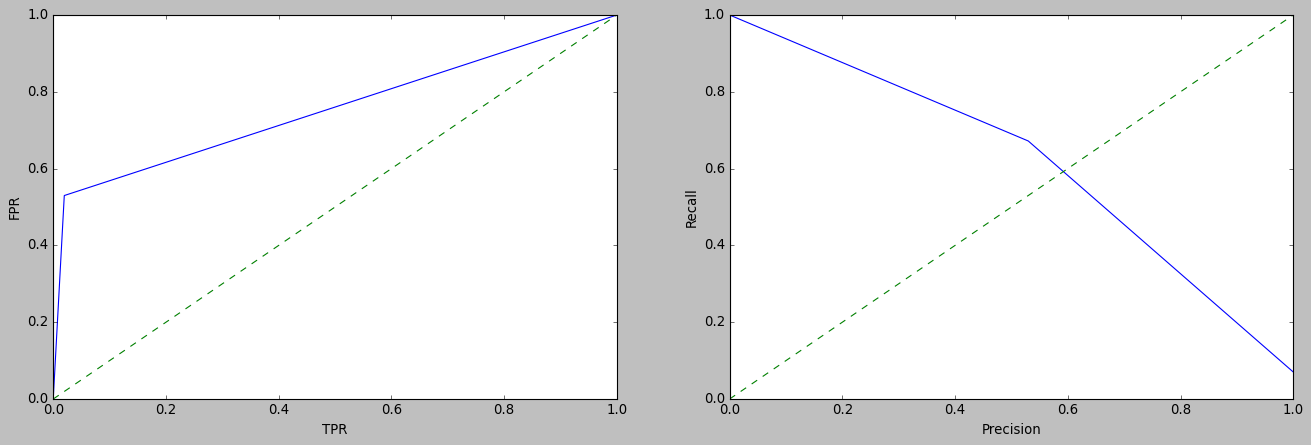

In [36]:
fpr, tpr, thres_r = roc_curve(y_test, y_pred_test)
precision, recall, thres_p = precision_recall_curve(y_test, y_pred_test)

plt.style.use("classic")
fig, ax = plt.subplots(1,2, figsize=(20,6))
ax[0].plot(fpr, tpr)
ax[0].plot([0,1], linestyle="--")
ax[0].plot([0,0],[1,0], c='0.7')
ax[0].plot([1,1], c="0.7")
ax[0].set_xlabel("TPR")
ax[0].set_ylabel("FPR")

ax[1].plot(recall, precision)
ax[1].plot([0,1], linestyle="--")
ax[1].plot([0,0],[1,0], c='0.7')
ax[1].plot([1,1], c="0.7")
ax[1].set_xlabel("Precision")
ax[1].set_ylabel("Recall")

plt.show()

In [38]:
roc_auc_score(y_test, y_pred_test)

0.7551380589991881

In [39]:
3*4*4*2*5*2*3

2880

In [40]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# parameters for GridSearchCV
# specify parameters and distributions to sample from
param_dist = {"max_depth": [2,4,5],
              "min_samples_split": [2,4,7,9],
              "min_samples_leaf": [3,5,7,11],
              "bootstrap": [True, False],
              "n_estimators": [12,90,100,300,700],
              "criterion" : ["gini", "entropy"],
              'max_features': ['sqrt', 'log2', None]
             }


gscv = GridSearchCV(model, param_grid= param_dist,
                                   n_jobs = -1)
gscv.fit(X_train, y_train)

In [ ]:
y_pred_test1 = gscv.predict(X_test)

In [ ]:
print('Accuracy score for test data is:', accuracy_score(y_test,y_pred_test1))

In [ ]:
precision_score(y_test,y_pred_test1)

In [ ]:
recall_score(y_test,y_pred_test1)

In [ ]:
f1_score(y_test,y_pred_test1)

In [ ]:
fpr_log,tpr_log,thres_log = roc_curve(y_test,y_pred_test1)
log_precision, log_recall, log_thres = precision_recall_curve(y_test, y_pred_test1)


fig, ax = plt.subplots(1,2,figsize=(20,6))
ax[0].plot(fpr_log,tpr_log)
ax[0].plot([0, 1], ls="--")
ax[0].plot([0, 0], [1, 0] , c=".7")
ax[0].plot([1, 1] , c=".7")
ax[0].set_ylabel('True Positive Rate')
ax[0].set_xlabel('False Positive Rate')


ax[1].plot(log_recall,log_precision)
ax[1].plot([0, 1], ls="--")
ax[1].plot([0, 0], [1, 0] , c=".7")
ax[1].plot([1, 1] , c=".7")
ax[1].set_ylabel('Precision')
ax[1].set_xlabel('Recall')

In [ ]:
precision_dict = {'Baseline Model':precision_score(y_test, y_pred_test),
                  'Tuned Model':precision_score(y_test, y_pred_test1)}

In [ ]:
precision = pd.DataFrame(precision_dict, index=['Scores'])

In [ ]:
precision

# Happy Learning